<a href="https://colab.research.google.com/github/kjamison/brainmontageplot/blob/main/brainmontageplot_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
#may need to restart the runtime and run again after the first time this installs new packages
import sys
if 'brainmontage' not in sys.modules:
  !pip install git+https://github.com/kjamison/brainmontageplot.git

import numpy as np
from brainmontage import create_montage_figure, save_image
from matplotlib import pyplot as plt


CPU times: user 1.48 s, sys: 83.6 ms, total: 1.57 s
Wall time: 1.58 s


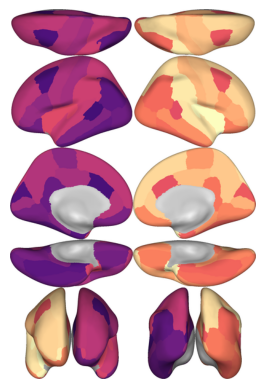

In [16]:
%%time

roivals=np.arange(86)+1 #example values for each ROI (1-numroi)

img=create_montage_figure(roivals,atlasname='fs86', 
    viewnames='all',surftype='infl',clim=[0,86],colormap='magma')

save_image(img,'mydata_montage.png')
#or you can add outputimagefile='mydata_montage.png' to create_montage_figure() to save directly

plt.figure()
plt.imshow(img)
_=plt.axis('off')


Saved mydata_montage_withslices_and_colorbar.png
CPU times: user 4.77 s, sys: 502 ms, total: 5.27 s
Wall time: 5.3 s


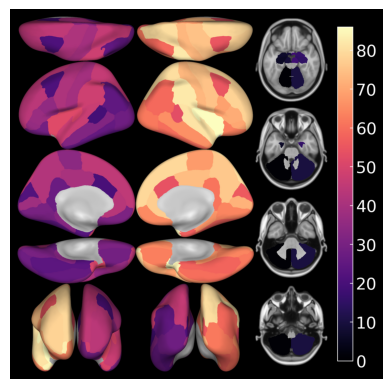

In [17]:
%%time
#create an image with surface views, upscaled to higher dpi (1 instead of 0.25), 
# a vertical row of axial slices, with black background
img_with_slices=create_montage_figure(roivals,atlasname='fs86',
    viewnames='all',surftype='infl',clim=[0,86],colormap='magma',
    slice_dict={'axial':[23,33,43,53]},mosaic_dict={'axial':[-1,1]},
    upscale_factor=2, backgroundcolor="black",face_mode='best',
    add_colorbar=True, colorbar_color='white', colorbar_fontsize=20,
    outputimagefile='mydata_montage_withslices_and_colorbar.png')

plt.figure()
plt.imshow(img_with_slices,cmap='magma',vmin=0,vmax=86)
_=plt.axis('off')


Saved mydata_montage_onlyslices.png
CPU times: user 2.87 s, sys: 276 ms, total: 3.14 s
Wall time: 3.06 s


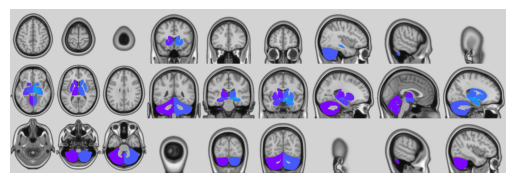

In [18]:
%%time
#Or an image with axial, coronal, and sagittal slices only, and a light gray background
img_slices=create_montage_figure(roivals,atlasname='fs86',
    viewnames='none',clim=[0,86],colormap='rainbow',
    slice_dict={'axial':range(0,180,20),'coronal':range(20,200,20),'sagittal':range(10,180,20)},
    backgroundcolor="lightgray",
    outputimagefile='mydata_montage_onlyslices.png')

plt.figure()
plt.imshow(img_slices)
_=plt.axis('off')


For cmapfile=lut, override input values and clim to display LUT colormap: /usr/local/lib/python3.10/dist-packages/brainmontage/atlases/fs86_LUT.txt.
For cmapfile=lut, override input values and clim to display LUT colormap: /usr/local/lib/python3.10/dist-packages/brainmontage/atlases/fs86_LUT.txt.
For cmapfile=lut, override input values and clim to display LUT colormap: /usr/local/lib/python3.10/dist-packages/brainmontage/atlases/shen268_LUT.txt.
For cmapfile=lut, override input values and clim to display LUT colormap: /usr/local/lib/python3.10/dist-packages/brainmontage/atlases/schaefer100_7Networks_LUT.txt.
For cmapfile=lut, override input values and clim to display LUT colormap: /usr/local/lib/python3.10/dist-packages/brainmontage/atlases/schaefer200_7Networks_LUT.txt.
For cmapfile=lut, override input values and clim to display LUT colormap: /usr/local/lib/python3.10/dist-packages/brainmontage/atlases/schaefer300_7Networks_LUT.txt.
For cmapfile=lut, override input values and clim to 

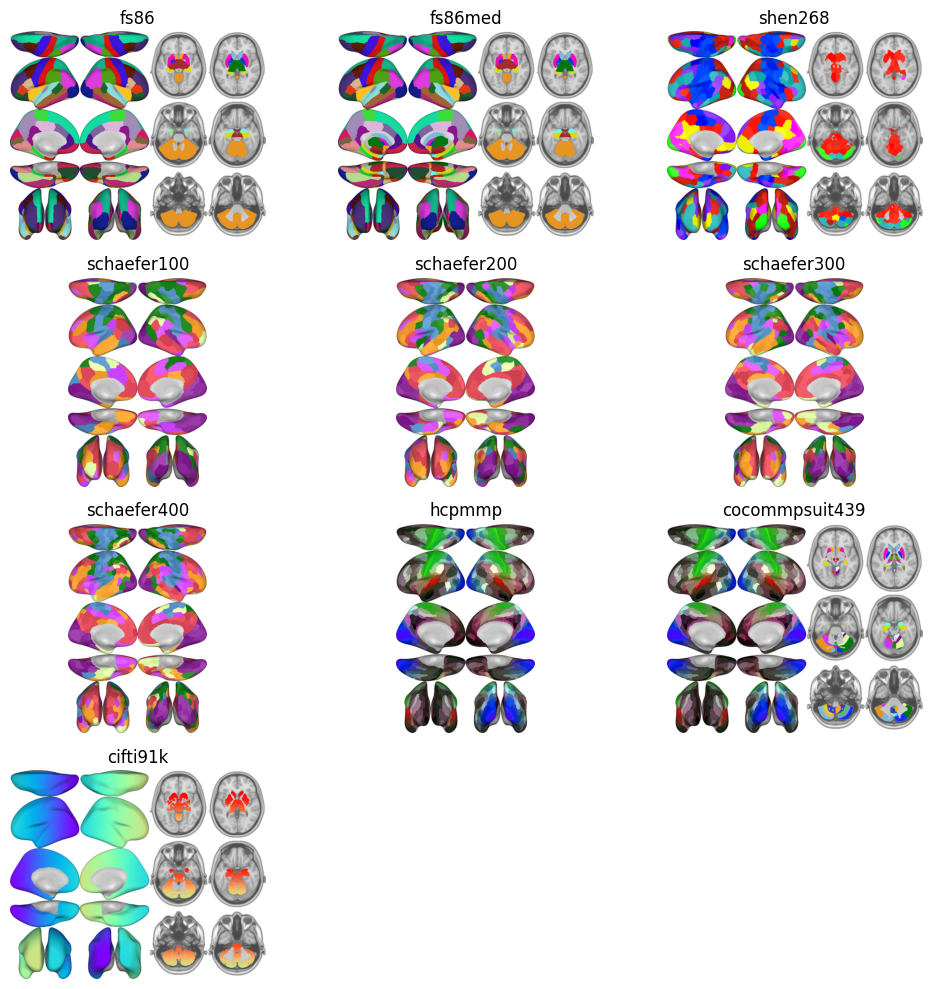

In [19]:
%%time
#loop through and display all available atlases, using colors from their LUT

from brainmontage import retrieve_atlas_info

atlaslist=retrieve_atlas_info('list')

fig=plt.figure(figsize=(10,10))
for i,a in enumerate(atlaslist):
  atlasinfo=retrieve_atlas_info(a)
  if atlasinfo['subcorticalvolume']:
    sliceparams={'slice_dict':{'axial':[23,33,43,53,63,73]},
                 'mosaic_dict':{'axial':[-1,2]},
                 'slice_background_alpha':.75}
  else:
    sliceparams={}
  img=create_montage_figure(roivals=None,atlasname=a,colormap='lut',**sliceparams)
  ax=plt.subplot(int(np.ceil(np.sqrt(len(atlaslist)))),int(np.floor(np.sqrt(len(atlaslist)))),i+1)
  ax.imshow(img)
  ax.axis('off')
  ax.set_title(a)

fig.tight_layout()

2023-06-06 20:11:30 URL:https://raw.githubusercontent.com/kjamison/brainmontageplot/main/examples/S1200_7T_Retinotopy181.Fit3_R2_MSMAll.32k_fs_LR.dscalar.nii [997032/997032] -> "S1200_7T_Retinotopy181.Fit3_R2_MSMAll.32k_fs_LR.dscalar.nii" [1]
CPU times: user 5.7 s, sys: 380 ms, total: 6.08 s
Wall time: 6.58 s


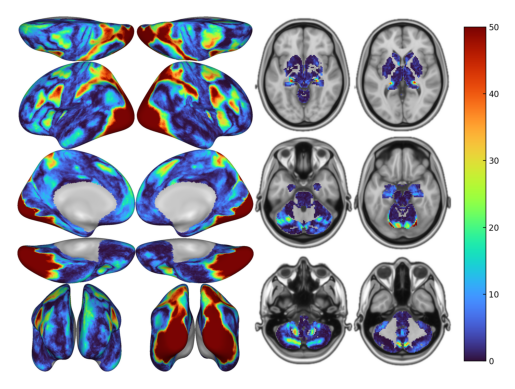

In [20]:
%%time
#example of reading and displaying cifti91k data

#Download example cifti map from HCP Retinotopy dataset (https://balsa.wustl.edu/study/9Zkk)
!wget -nv -O S1200_7T_Retinotopy181.Fit3_R2_MSMAll.32k_fs_LR.dscalar.nii https://github.com/kjamison/brainmontageplot/raw/main/examples/S1200_7T_Retinotopy181.Fit3_R2_MSMAll.32k_fs_LR.dscalar.nii

import nibabel as nib
ciftidata=nib.load("S1200_7T_Retinotopy181.Fit3_R2_MSMAll.32k_fs_LR.dscalar.nii").get_fdata()[0,:]

img=create_montage_figure(roivals=ciftidata,atlasname="cifti91k",colormap="turbo",clim=[0,50],
                          slice_dict={'axial':[23,33,43,53,63,73]},mosaic_dict={'axial':[-1,2]},
                          add_colorbar=True, upscale_factor=2)
plt.figure()
plt.imshow(img)
_=plt.axis('off')


2023-06-06 20:11:36 URL:https://raw.githubusercontent.com/Washington-University/HCPpipelines/master/global/templates/91282_Greyordinates/L.atlasroi.32k_fs_LR.shape.gii [3510/3510] -> "L.atlasroi.32k_fs_LR.shape.gii" [1]
2023-06-06 20:11:36 URL:https://raw.githubusercontent.com/Washington-University/HCPpipelines/master/global/templates/91282_Greyordinates/R.atlasroi.32k_fs_LR.shape.gii [3539/3539] -> "R.atlasroi.32k_fs_LR.shape.gii" [1]
CPU times: user 2.14 s, sys: 254 ms, total: 2.39 s
Wall time: 2.39 s


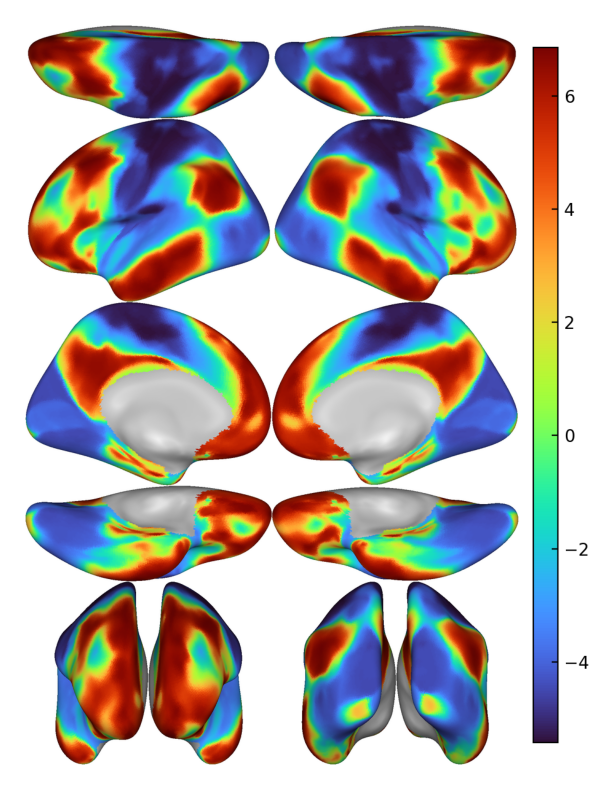

In [21]:
%%time
#example reading and displaying 32k cifti data from neuromaps

if 'neuromaps' not in sys.modules:
  !pip install git+https://github.com/netneurolab/neuromaps.git

from neuromaps import datasets

#fetch fslr 32k fcgradient01 dataset from neuromaps
fcgrad01 = datasets.fetch_annotation(source='margulies2016',desc='fcgradient01',return_single=True)
Ldata=nib.load(fcgrad01[0]).agg_data()
Rdata=nib.load(fcgrad01[1]).agg_data()

#fetch masks to map fslr 32k (full sphere) data to cifti ROI (excludes medial wall)
hcpurl='https://raw.githubusercontent.com/Washington-University/HCPpipelines/master/global/templates/91282_Greyordinates'
!wget -nv -O L.atlasroi.32k_fs_LR.shape.gii {hcpurl}/L.atlasroi.32k_fs_LR.shape.gii
!wget -nv -O R.atlasroi.32k_fs_LR.shape.gii {hcpurl}/R.atlasroi.32k_fs_LR.shape.gii

Lmask=nib.load('L.atlasroi.32k_fs_LR.shape.gii').agg_data()
Rmask=nib.load('R.atlasroi.32k_fs_LR.shape.gii').agg_data()

#concatenate masked LH and RH vertices
ciftidata=np.concatenate((Ldata[Lmask>0],Rdata[Rmask>0]))

img=create_montage_figure(roivals=ciftidata,atlasname="cifti91k",colormap="turbo",
                        upscale_factor=2,add_colorbar=True)

plt.figure(figsize=(10,10))
plt.imshow(img)
_=plt.axis('off')